<a href="https://colab.research.google.com/github/MaldoAlberto/Qiskit-Simple-graph/blob/master/qiskit_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generation of a graph using a real quantum computer**

Exist the design of a simple graph with three nodes, this representation is possible with a quantum circuit that is generate from a  binary tree.

![alt text](https://drive.google.com/uc?id=1tVk07bPFeS235lSJwEixYPuitJzga6GS)



In [0]:
!pip install qiskit

In [0]:
import qiskit
qiskit.__version__


'0.12.0'

In [0]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

In [0]:
import numpy as np
imagen_entrada = np.zeros((7,7),np.uint8)
imagen_entrada[2][2] = 1
imagen_entrada[2][3] = 1
imagen_entrada[3][2] = 1
imagen_entrada[3][3] = 1
imagen_entrada[2][4] = 1
imagen_entrada[4][3] = 1
imagen_entrada[4][2] = 1
imagen_entrada[3][4] = 1
imagen_entrada[4][4] = 1


# para agregar columnas de ceros es iniciar uno a la iquierda y luego uno a la derecha,  y asíí hasta tener  n-1 del tamaño de la imagen de ancho
print(imagen_entrada, len(imagen_entrada),len(imagen_entrada[0]))
#salidas erosion y dilatacion
erosion= []
dilatacion = []


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]] 7 7


In [0]:
def compuerta(circuit,a,b,c):
  circuit.x(a)
  circuit.toffoli(a,b,c)
  circuit.cx(c, b)
  circuit.x(a)
  circuit.cx(a,c)



In [0]:
def twoGate(circuit,entrada,i,j,a,b,c,d,e,f,g,x0,x1):
  circuit.h(a)
  circuit.cnot(a,d)
  circuit.h(b)
  circuit.h(e)
  compuerta(circuit,a,b,c)
  compuerta(circuit,d,e,f)
  compuerta(circuit,b,e,g) 


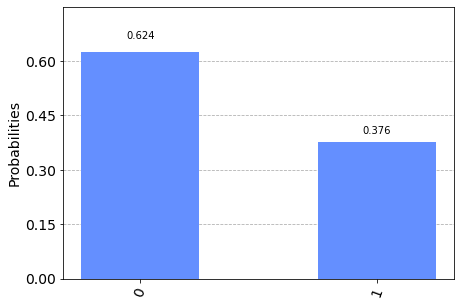

In [0]:
for i in range(len(imagen_entrada)):
  for j in range(len(imagen_entrada[0])-3):
    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(6, 1)

#    twoGate(circuit,imagen_entrada,i,j,0,1,2,3,4,5,6,2,2) 
    circuit.h(0)
    circuit.h(1)
    circuit.h(3)
    circuit.x(0)
    circuit.toffoli(0,1,2)
    circuit.cx(2, 1)
    circuit.x(0)
    circuit.cx(0,2)
    circuit.x(0)
    circuit.toffoli(0,3,4)
    circuit.cx(4, 3)
    circuit.x(0)
    circuit.cx(0,4)
    
    circuit.x(1)
    circuit.toffoli(1,3,5)
    circuit.cx(5, 3)
    circuit.x(1)
    circuit.cx(1,5)
    circuit.measure([5], [0])

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=100000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(circuit)
    b = str(counts)[2:3]
    #print( b, counts)
    #b = a[3:8]
    #print("\nCount results:",(counts),b)
    erosion.append(b)


    #print(erosion)
# Draw the circuit
circuit.draw()

# Plot a histogram
plot_histogram(counts)


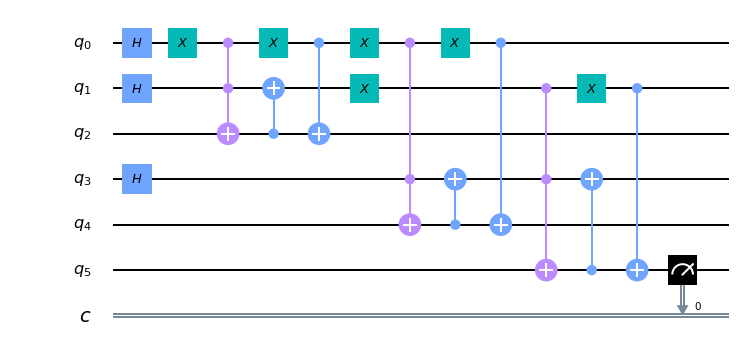

In [0]:
%matplotlib inline
circuit.draw(output = "mpl")

In [0]:
y = erosion
y = np.array(y).reshape(4,7)
#y = np.delete(y, [6], axis=1)
print("erosion")
print()
print(y)


ValueError: ignored

In [0]:
from qiskit import IBMQ
IBMQ.save_account('805ce7f981e887d0ca1fba51e00a024373a35e367621fdb15c47dab7ee3fa7dde270fe7aa0b6cc274d82c44673d69aa7cc34258c186982337973db729e7e77ae')

In [0]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [0]:
import operator

Job Status: job has successfully run


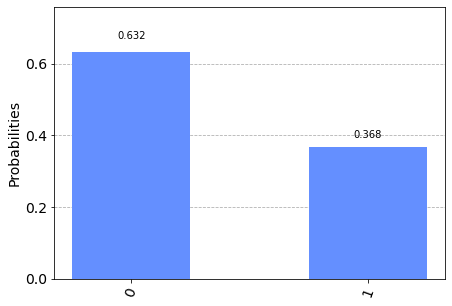

In [0]:
for i in range(1):
  for j in range(1):
    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(6, 1)
    circuit.h(0)
    circuit.h(1)
    circuit.h(3)
    circuit.x(0)
    circuit.toffoli(0,1,2)
    circuit.cx(2, 1)
    circuit.x(0)
    circuit.cx(0,2)
    circuit.x(0)
    circuit.toffoli(0,3,4)
    circuit.cx(4, 3)
    circuit.x(0)
    circuit.cx(0,4)
    
    circuit.x(1)
    circuit.toffoli(1,3,5)
    circuit.cx(5, 3)
    circuit.x(1)
    circuit.cx(1,5)
    circuit.measure([5], [0])


    provider = IBMQ.get_provider('ibm-q')
    qcomp = provider.get_backend('ibmq_16_melbourne')
    job = execute(circuit,backend=qcomp,shots=8192)

    from qiskit.tools.monitor import job_monitor
    job_monitor(job)
    result = job.result()

    # Returns counts
    counts = result.get_counts(circuit)
    b =  max(counts.items(), key=operator.itemgetter(1))[0]
    erosion.append(b)


    #print(erosion)
# Draw the circuit
circuit.draw()

# Plot a histogram
plot_histogram(counts)


In [0]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [0]:
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], 
                                               circlabel='measurement_calibration')

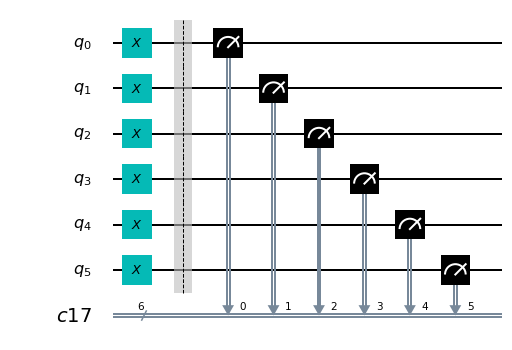

In [0]:
cal_circuits[63].draw(output='mpl')

In [0]:
len(cal_circuits)

64

In [0]:
cal_job = execute(cal_circuits,
             backend=qcomp,
             shots=1024,
             optimization_level=0)
#print(cal_job.job_id())
job_monitor(cal_job)


Job Status: job has successfully run


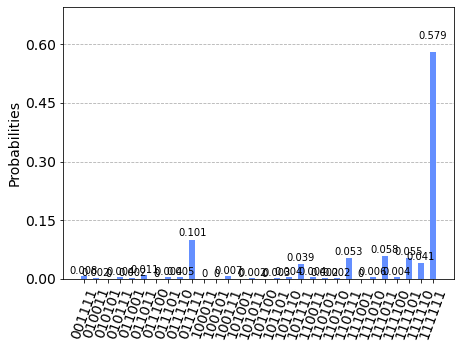

In [0]:
cal_results = cal_job.result()
plot_histogram(cal_results.get_counts(cal_circuits[63]))

### Creating the Measurement Fitter Object in Ignis 

In [0]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

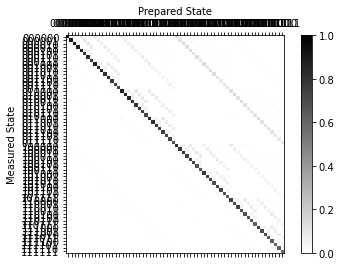

In [0]:
meas_fitter.plot_calibration()

In [0]:
meas_filter = meas_fitter.filter

In [0]:
mitigated_result = meas_filter.apply(result)

/usr/local/lib/python3.6/dist-packages/qiskit/visualization/counts_visualization.py:241: RuntimeWarning: invalid value encountered in true_divide
  pvalues = values[where_idx] / sum(values[where_idx])


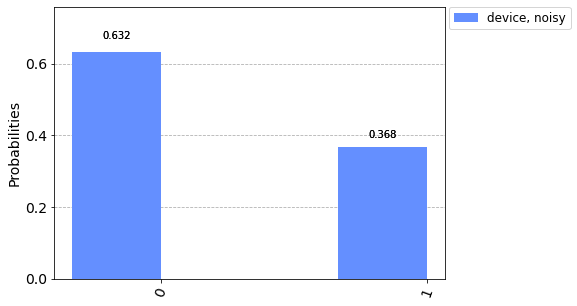

In [0]:
device_counts = result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], 
               legend=['device, noisy', 'device, mitigated'])

In [0]:
mitigated_counts

{}